El valor de x_T es: 64.649285
f(64.649285) = 0.015000
¿f(64.649285) < 0.015? True


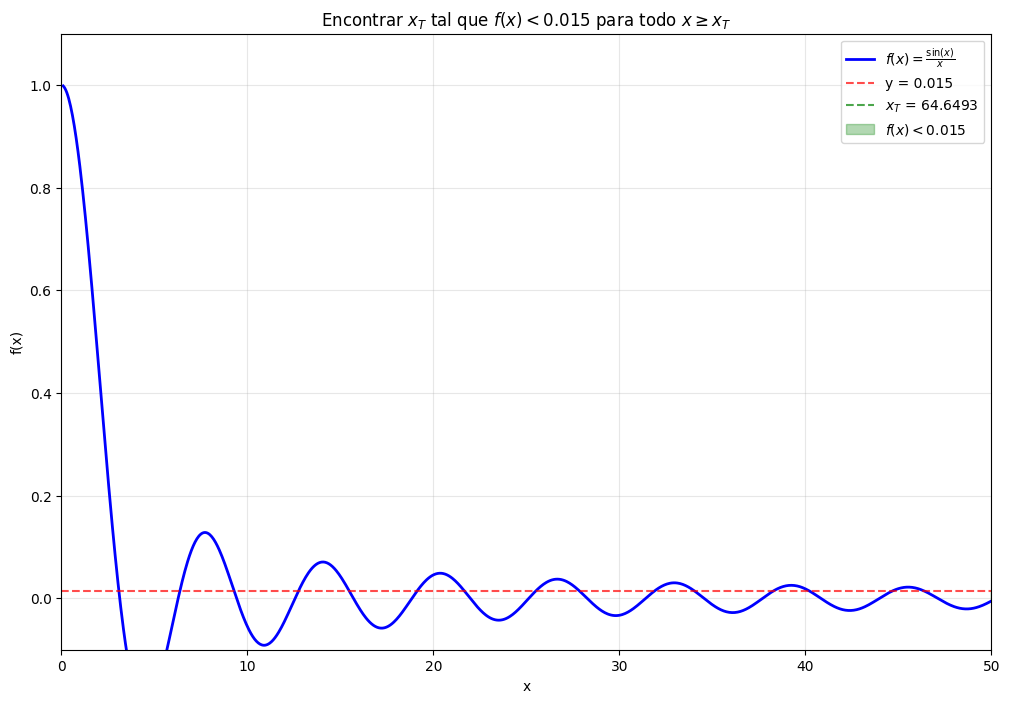


Verificación con método de Newton: x_T = 64.649285
x_T = 64.649285
Para todo x ≥ 64.649285, se cumple que f(x) < 0.015


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton
import matplotlib.animation as animation
from matplotlib.patches import Rectangle

def f(x):
    return np.sin(x) / x

def find_xt():
    def g(x):
        return f(x) - 0.015

    x_vals = np.linspace(10, 100, 1000)
    g_vals = g(x_vals)
    
    sign_changes = []
    for i in range(len(x_vals)-1):
        if g_vals[i] * g_vals[i+1] < 0:
            sign_changes.append((x_vals[i], x_vals[i+1]))
    
    if sign_changes:
        last_interval = sign_changes[-1]
        x_T = bisect(g, last_interval[0], last_interval[1])
        return x_T
    else:
        for i in range(len(x_vals)):
            if f(x_vals[i]) < 0.015:
                return x_vals[i]
        return None

x_T = find_xt()
print(f"El valor de x_T es: {x_T:.6f}")

print(f"f({x_T:.6f}) = {f(x_T):.6f}")
print(f"¿f({x_T:.6f}) < 0.015? {f(x_T) < 0.015}")

x = np.linspace(0.1, 50, 1000)
y = f(x)

plt.figure(figsize=(12, 8))
plt.plot(x, y, 'b-', linewidth=2, label=r'$f(x) = \frac{\sin(x)}{x}$')
plt.axhline(y=0.015, color='r', linestyle='--', alpha=0.7, label='y = 0.015')
plt.axvline(x=x_T, color='g', linestyle='--', alpha=0.7, label=f'$x_T$ = {x_T:.4f}')

x_fill = np.linspace(x_T, 50, 100)
y_fill = f(x_fill)
plt.fill_between(x_fill, y_fill, 0.015, where=(y_fill < 0.015), 
                 color='green', alpha=0.3, label='$f(x) < 0.015$')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(r'Encontrar $x_T$ tal que $f(x) < 0.015$ para todo $x \geq x_T$')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(-0.1, 1.1)
plt.xlim(0, 50)
plt.savefig('grafica_funcion.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

def animate(frame):
    ax.clear()
    ax.plot(x, y, 'b-', linewidth=2, label=r'$f(x) = \frac{\sin(x)}{x}$')
    ax.axhline(y=0.015, color='r', linestyle='--', alpha=0.7, label='y = 0.015')
    
    current_x = min(x_T, frame * 0.5)
    ax.axvline(x=current_x, color='g', linestyle='--', alpha=0.7, 
               label=f'$x$ = {current_x:.2f}')
    
    if current_x < max(x):
        x_after = x[x >= current_x]
        y_after = f(x_after)
        max_after = np.max(y_after) if len(y_after) > 0 else 0
        ax.plot([], [], ' ', label=f'max f(x≥{current_x:.1f}) = {max_after:.4f}')
    
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title(f'Buscando $x_T$ (frame {frame})')
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(0, 50)

anim = animation.FuncAnimation(fig, animate, frames=100, interval=100, repeat=False)
anim.save('animacion_busqueda_xt.gif', writer='pillow', fps=10)
plt.close()


def g(x):
    return np.sin(x)/x - 0.015

try:
    x_T_newton = newton(g, x_T + 0.1)
    print(f"\nVerificación con método de Newton: x_T = {x_T_newton:.6f}")
    # print(f"f({x_T_newton:.6f}) = {f(x_T_newton):.6f}")
except:
    print("El método de Newton no converge para esta función en este punto")

print(f"x_T = {x_T:.6f}")
print(f"Para todo x ≥ {x_T:.6f}, se cumple que f(x) < 0.015")